In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from collections import Counter
from collections import defaultdict

#!pip install scikit-plot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score 
from scikitplot.metrics import plot_precision_recall, plot_roc, plot_cumulative_gain, plot_lift_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report

In [61]:
df_test = pd.read_csv("/content/Test_ripulito")
df_train = pd.read_csv("/content/Train_ripulito")

In [62]:
df_test = df_test.drop(columns=['Unnamed: 0'],axis=1)
df_train = df_train.drop(columns=['Unnamed: 0'],axis=1)

In [63]:
df_train_copy = df_train
df_test_copy = df_test

In [64]:
t_train = df_train.drop(columns=['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'sex', 'filename'])
t_test = df_test.drop(columns=['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'sex', 'filename'])

In [66]:
columns_train = []
columns_train = t_train.columns
columns_test = []
columns_test = t_test.columns

In [67]:
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(t_train)
#print(x_train_norm)
x_test_norm = scaler.transform(t_test)
#print(x_test_norm)

In [68]:
df_trainNORM = pd.DataFrame(x_train_norm, columns = columns_train)
df_testNORM = pd.DataFrame(x_test_norm, columns = columns_test)

In [69]:
"""df_trainNORM = df_trainNORM.assign(vocal_channel = df_train_copy['vocal_channel'].values)
df_trainNORM = df_trainNORM.assign(emotional_intensity = df_train_copy['emotional_intensity'].values)
df_trainNORM = df_trainNORM.assign(statement = df_train_copy['statement'].values)
df_trainNORM = df_trainNORM.assign(repetition = df_train_copy['repetition'].values)
df_trainNORM = df_trainNORM.assign(sex = df_train_copy['sex'].values)
df_trainNORM = df_trainNORM.assign(filename = df_train_copy['filename'].values)"""
df_trainNORM = df_trainNORM.assign(emotion = df_train_copy['emotion'].values)

In [70]:
"""df_testNORM = df_testNORM.assign(vocal_channel = df_test_copy['vocal_channel'].values)
df_testNORM = df_testNORM.assign(emotional_intensity = df_test_copy['emotional_intensity'].values)
df_testNORM = df_testNORM.assign(statement = df_test_copy['statement'].values)
df_testNORM = df_testNORM.assign(repetition = df_test_copy['repetition'].values)
df_testNORM = df_testNORM.assign(sex = df_test_copy['sex'].values)
df_testNORM = df_testNORM.assign(filename = df_test_copy['filename'].values)"""
df_testNORM = df_testNORM.assign(emotion = df_test_copy['emotion'].values)

aggiungo colonna happy al dataset di test e train dopo averli normalizzati 

In [71]:
train_happy = []
for value in df_trainNORM['emotion']:
  if(value == 'happy'):
    train_happy.append(1)
  else:
    train_happy.append(0)

In [72]:
df_trainNORM = df_trainNORM.assign(happy = train_happy)

In [73]:
test_happy = []
for value in df_testNORM['emotion']:
  if(value == 'happy'):
    test_happy.append(1)
  else:
    test_happy.append(0)

In [74]:
df_testNORM = df_testNORM.assign(happy = test_happy)

uso train ribilanciato con la tecnica migliore ottenuta e uso test sbilanciato 

sbilancio del 96 e 4 % il test e il train

In [75]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
#classe da sbilanciare
class_name = 'happy'

In [77]:
#sbilanciamento train
attributes = [col for col in df_trainNORM.columns if col != class_name]
X = df_trainNORM[attributes].values
y = df_trainNORM[class_name]

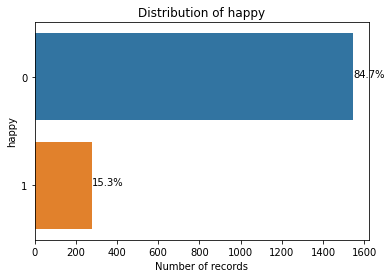

In [78]:
ax = sns.countplot(y="happy", data=df_trainNORM)
plt.title('Distribution of happy')
plt.xlabel('Number of records')
total = len(df_trainNORM['happy'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

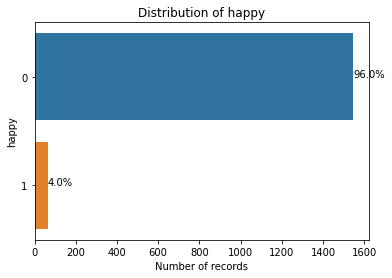

In [79]:
from imblearn.datasets import make_imbalance
seed = 100
attributes = [col for col in df_trainNORM.columns if col != class_name]
X = df_trainNORM[attributes]
y = df_trainNORM[class_name]
#sbilanciamento 96% e 4%
X_res, y_res = make_imbalance(X, y, sampling_strategy={0: 1548, 1: 64}, random_state=seed)

dxres = pd.DataFrame(X_res)
dyres = pd.DataFrame(y_res)

df2_train_sbil=pd.concat([dxres, dyres], axis=1, join="inner")
#attr= [col for col in df_trainNORM.columns]
#df2.columns = attr
ax = sns.countplot(y="happy", data=df2_train_sbil)
plt.title('Distribution of happy')
plt.xlabel('Number of records')
total = len(df2_train_sbil['happy'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [80]:
#sbilanciamento test
attributes2 = [col for col in df_testNORM.columns if col != class_name]
X = df_testNORM[attributes2].values
y = df_testNORM[class_name]

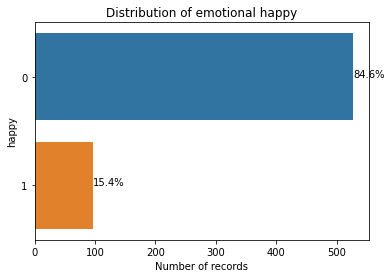

In [81]:
ax = sns.countplot(y="happy", data=df_testNORM)
plt.title('Distribution of emotional happy')
plt.xlabel('Number of records')
total = len(df_testNORM['happy'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

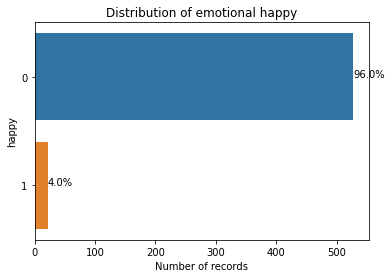

In [82]:
from imblearn.datasets import make_imbalance
seed = 100
attributes = [col for col in df_testNORM.columns if col != class_name]
X = df_testNORM[attributes]
y = df_testNORM[class_name]
#sbilanciamento 96% e 4%
X_res, y_res = make_imbalance(X, y, sampling_strategy={0: 528, 1: 22}, random_state=seed)

dxres = pd.DataFrame(X_res)
dyres = pd.DataFrame(y_res)

df2_test_sbil=pd.concat([dxres, dyres], axis=1, join="inner")
#attr= [col for col in df_trainNORM.columns]
#df2.columns = attr
ax = sns.countplot(y="happy", data=df2_test_sbil)
plt.title('Distribution of emotional happy')
plt.xlabel('Number of records')
total = len(df2_test_sbil['happy'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [83]:
#!pip install scikit-plot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score 
from scikitplot.metrics import plot_precision_recall, plot_roc, plot_cumulative_gain, plot_lift_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_roc_curve
from sklearn.model_selection import KFold, StratifiedKFold,RepeatedStratifiedKFold, cross_val_score, KFold, RandomizedSearchCV,GridSearchCV, RepeatedKFold
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report

Dopo aver sbilanciato del 96% e 4% i due dataset, come fatto nell'imbalanced learning, ora ribilancio con la miglior tecnica ottenuta dall'imbalanced il dataset di train; mentre il dataset di test lo lascio sbilanciato.

In [84]:
X_train = df2_train_sbil.drop(columns = ['happy', 'emotion'])
y_train = df2_train_sbil[['happy']]
X_test = df2_test_sbil.drop(columns = ['happy', 'emotion'])
y_test = df2_test_sbil[['happy']]
#0 not happy e 1 happy

In [85]:
y_train.value_counts()

happy
0        1548
1          64
dtype: int64

In [86]:
#tecnica di ribilanciamento scelta = CNN 
from imblearn.under_sampling import CondensedNearestNeighbour
cnn = CondensedNearestNeighbour(random_state=42, n_jobs=10)   #n_jobs numero di processori da utilizzare 
X_res, y_res = cnn.fit_resample(X_train, y_train['happy'])
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 247, 1: 64})


In [87]:
X_res #nuovo dataset di train da considerare.. ovvero quello ri-bilanciato

,sum,std,q25,q50,q75,kur,skew,lag1_sum,lag1_q25,lag1_kur,...,sc_q25_w4,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_mean_w4,stft_std_w4,stft_min_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,-0.001191,-0.279088,0.603864,-0.063106,-0.748640,2.762523,1.552638,0.027433,0.603131,1.139540,...,1.359687,2.329878,-1.678346,0.503814,0.996620,-1.505683,1.660745,0.036057,0.088156,0.235493
1,0.031822,0.619406,-2.103481,-0.063106,4.375025,-0.934996,-0.735521,-0.655365,-0.818754,-0.756630,...,-1.821192,-0.604285,0.782487,4.407202,1.284841,-0.243718,0.059038,0.036057,1.165259,-1.758966
2,0.303044,-0.916425,0.585063,-0.063106,-0.645341,-0.148802,-1.592160,0.179166,0.603131,0.403355,...,1.141403,-0.110478,0.658416,-0.498057,1.136865,-1.583484,2.268027,0.036057,-0.278330,0.352553
3,0.006202,-0.228802,0.585063,-0.063106,-0.748640,0.508856,0.654520,0.027433,0.603131,0.393771,...,1.059419,0.215524,-0.432006,-0.300172,0.536332,-0.729762,0.050839,0.036057,0.507684,-0.355923
4,0.178059,-0.175318,-0.242181,-0.063106,0.201717,0.636907,0.295529,-1.945095,0.247660,0.126079,...,-1.433835,-0.375639,0.907477,0.371353,1.491335,-1.093245,1.523521,0.036057,0.959866,-1.312710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0.498093,-0.487172,0.566262,-0.063106,-0.542041,0.039736,-0.935504,0.027433,0.484641,0.452141,...,0.672651,0.178876,-0.952562,-0.458616,0.072804,-0.537430,-0.336379,0.036057,-0.045914,0.437535
307,-0.041378,-0.178707,-0.542997,-0.063106,1.090094,-1.060654,-0.389414,0.141233,-0.107811,-0.384384,...,-1.498369,-0.698687,0.518051,-0.284721,-0.870661,1.210881,-0.725238,0.036057,-0.963499,0.449542
308,-0.085931,1.042703,0.397053,-0.063106,-0.480061,0.199978,0.181318,0.027433,0.129169,-0.689063,...,0.056089,-0.447941,-0.275274,-0.608113,-0.209275,0.767704,-0.611216,0.036057,-0.389754,-0.456016
309,0.024757,0.226174,0.340650,-0.063106,1.792532,-0.791260,-0.547137,0.065366,-0.226302,-0.767683,...,-0.393048,-0.524963,0.590588,0.183955,-1.130240,0.795997,-0.296222,0.036057,-0.967548,1.382950


In [88]:
X_res = X_res.dropna()

Definizione funzione Grid Search

In [89]:
# Funzione per fare la GridSearch()
def customGridSearch(X_train, y_train, model, tuned_parameters,score):

    print("____________________________________________ START GRID SEARCH ____________________________________________")

    results = {}
    
    print("------- Score = " + score +  "------- \n")
        
    k_fold = RepeatedStratifiedKFold() # 5 split default, 10 repetitions default
    print("> Fold = " + str(k_fold) + "\n")
        
    clf = GridSearchCV(model, tuned_parameters, error_score='raise', cv=k_fold, scoring = score, return_train_score=True)
    clf.fit(X_train, y_train)

    print("> Best Parameter set: \n")
    best = clf.best_params_
    print(best)
        
    print("\n> Grid scores:\n")

    means = clf.cv_results_['mean_train_score']
    stds = clf.cv_results_['std_train_score']

    print("...........RESULTS FOR TRAINING.........")
    print("........................................")

   
    
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
                          
    print("____________________________________________ END GRID SEARCH ____________________________________________")
        
    results[score] = best
    
    return results

Iniziamo con le tecniche di dimensionality reduction

*   X_res = dataset di train ri-bialanciato da utilizzare 
*   y_res = etichetta del train ri-bilanciato


Variance Threshold

In [90]:
from sklearn.decomposition import PCA
from itertools import product
from yellowbrick.datasets import load_credit
from yellowbrick.features import PCA as yPCA

from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.contrib.classifier import DecisionViz

from sklearn.feature_selection import VarianceThreshold

In [91]:
def test_threshold(classifier):
    ran = [0.03, 0.04, 0.05, 0.10, 0.15, 0.18, 0.19, 0.2]
    print(classifier)
    for i in ran:
        print(i)
        sel = VarianceThreshold(i)
        X_train_sel = sel.fit_transform(X_res)

        print(X_train_sel.shape)
        X_test_sel = sel.transform(X_test)

        clf = classifier
        clf.fit(X_train_sel, y_res)

        y_pred = clf.predict(X_test_sel)

        print('Accuracy %s' % accuracy_score(y_test, y_pred))
        print('F1-score %s' % f1_score(y_test, y_pred, average=None))
        print(classification_report(y_test, y_pred))

In [92]:
test_threshold(DecisionTreeClassifier(min_samples_leaf=3, random_state=1000))
test_threshold(KNeighborsClassifier(n_neighbors=5))

DecisionTreeClassifier(min_samples_leaf=3, random_state=1000)
0.03
(311, 195)
Accuracy 0.8345454545454546
F1-score [0.90909091 0.08080808]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       528
           1       0.05      0.18      0.08        22

    accuracy                           0.83       550
   macro avg       0.51      0.52      0.49       550
weighted avg       0.93      0.83      0.88       550

0.04
(311, 195)
Accuracy 0.8345454545454546
F1-score [0.90909091 0.08080808]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       528
           1       0.05      0.18      0.08        22

    accuracy                           0.83       550
   macro avg       0.51      0.52      0.49       550
weighted avg       0.93      0.83      0.88       550

0.05
(311, 195)
Accuracy 0.8345454545454546
F1-score [0.90909091 0.08080808]
              precision    recall  f1-score   support

In [93]:
thresholds = [0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.15, 0.16, 0.19]
for i in thresholds:
    sel = VarianceThreshold(i)
    print(str(i))
    X_train_sel = sel.fit_transform(X_res, y_res)
    print(X_train_sel.shape)
    X_test_sel = sel.transform(X_test)

    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train_sel, y_res)
    y_pred = clf.predict(X_test_sel)
    print('KNN - Accuracy %s' % accuracy_score(y_test, y_pred))
    
    clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=1000)
    clf.fit(X_train_sel, y_res)
    y_pred = clf.predict(X_test_sel)
    print('DecisionTree - Accuracy %s' % accuracy_score(y_test, y_pred))
  

0.02
(311, 195)
KNN - Accuracy 0.9454545454545454
DecisionTree - Accuracy 0.8345454545454546
0.04
(311, 195)
KNN - Accuracy 0.9454545454545454
DecisionTree - Accuracy 0.8345454545454546
0.06
(311, 195)
KNN - Accuracy 0.9454545454545454
DecisionTree - Accuracy 0.8345454545454546
0.08
(311, 195)
KNN - Accuracy 0.9454545454545454
DecisionTree - Accuracy 0.8345454545454546
0.1
(311, 195)
KNN - Accuracy 0.9454545454545454
DecisionTree - Accuracy 0.8345454545454546
0.12
(311, 195)
KNN - Accuracy 0.9454545454545454
DecisionTree - Accuracy 0.8345454545454546
0.15
(311, 195)
KNN - Accuracy 0.9454545454545454
DecisionTree - Accuracy 0.8345454545454546
0.16
(311, 195)
KNN - Accuracy 0.9454545454545454
DecisionTree - Accuracy 0.8345454545454546
0.19
(311, 195)
KNN - Accuracy 0.9454545454545454
DecisionTree - Accuracy 0.8345454545454546


stesso metodo ma applicando la grid search

In [94]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_train_sel = sel.fit_transform(X_res)
X_test_sel = sel.transform(X_test)
X_train_sel.shape

(311, 195)

In [ ]:
check_params ={"criterion":["gini", "entropy"],
         "max_depth":[4, 6, 8, 10],
         "min_samples_split": [5, 10, 15, 20],
         "min_samples_leaf": [3, 5, 7, 9, 11]}

dt=DecisionTreeClassifier()
          
results = customGridSearch(X_train_sel, y_res, dt, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 7, 'min_samples_split': 15}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
0.770 (+/-0.131) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.761 (+/-0.138) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.749 (+/-0.127) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 15}
0.735 (+/-0.128) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 20}
0.765 (+/-0.120) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.765 (+/-0.120) for {'criterion':

In [ ]:
results

{'f1_macro': {'criterion': 'entropy',
  'max_depth': 8,
  'min_samples_leaf': 7,
  'min_samples_split': 15}}

In [95]:
#decision tree
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, min_samples_leaf = 7, min_samples_split = 15, random_state=42)
clf.fit(X_train_sel, y_res)

y_pred = clf.predict(X_test_sel)
print('Decision Tree')
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Decision Tree
Accuracy 0.8381818181818181
F1-score [0.91091091 0.11881188]
              precision    recall  f1-score   support

           0      0.966     0.862     0.911       528
           1      0.076     0.273     0.119        22

    accuracy                          0.838       550
   macro avg      0.521     0.567     0.515       550
weighted avg      0.930     0.838     0.879       550



In [ ]:
check_params = {'n_neighbors': [1, 5, 10, 15, 20], "weights":["distance", "uniform"], 'metric' :['minkowski', 'manhattan', 'euclidean']}

clf=KNeighborsClassifier()
          
results = customGridSearch(X_train_sel, y_res, clf, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'distance'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
0.572 (+/-0.065) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'distance'}
0.459 (+/-0.031) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'd

In [ ]:
results

{'f1_macro': {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}}

In [96]:
#knn
clf = KNeighborsClassifier(metric = 'minkowski', n_neighbors=5, weights = 'uniform')
clf.fit(X_train_sel, y_res)

y_pred = clf.predict(X_test_sel)
print('KNN')
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

KNN
Accuracy 0.9454545454545454
F1-score [0.97191011 0.0625    ]
              precision    recall  f1-score   support

           0      0.961     0.983     0.972       528
           1      0.100     0.045     0.063        22

    accuracy                          0.945       550
   macro avg      0.531     0.514     0.517       550
weighted avg      0.927     0.945     0.936       550



Univariate Feature Selection
1.   It selects the best features based on univariate statistical tests.


In [97]:
#scelta del k
from sklearn.feature_selection import SelectKBest
for i in range(1, 11):
    sel = SelectKBest(k=i)
    print(str(i))
    X_train_sel = sel.fit_transform(X_res, y_res)
    print(X_train_sel.shape)
    X_test_sel = sel.transform(X_test)

    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train_sel, y_res)
    y_pred = clf.predict(X_test_sel)
    print('KNN - Accuracy %s' % accuracy_score(y_test, y_pred))
    print('kNN - F1-score %s' % f1_score(y_test, y_pred, average=None))
    print(classification_report(y_test, y_pred, digits=3))
    
    clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=1000)
    clf.fit(X_train_sel, y_res)
    y_pred = clf.predict(X_test_sel)
    print('DecisionTree - Accuracy %s' % accuracy_score(y_test, y_pred))
    print('DecisionTree - F1-score %s' % f1_score(y_test, y_pred, average=None))
    print(classification_report(y_test, y_pred, digits=3))

    #migliori risultati con k = 5 o  k = 8 



1
(311, 1)
KNN - Accuracy 0.9
kNN - F1-score [0.94716619 0.06779661]
              precision    recall  f1-score   support

           0      0.961     0.934     0.947       528
           1      0.054     0.091     0.068        22

    accuracy                          0.900       550
   macro avg      0.508     0.512     0.507       550
weighted avg      0.925     0.900     0.912       550

DecisionTree - Accuracy 0.7509090909090909
DecisionTree - F1-score [0.85714286 0.02836879]
              precision    recall  f1-score   support

           0      0.954     0.778     0.857       528
           1      0.017     0.091     0.028        22

    accuracy                          0.751       550
   macro avg      0.485     0.435     0.443       550
weighted avg      0.916     0.751     0.824       550

2
(311, 2)
KNN - Accuracy 0.8854545454545455
kNN - F1-score [0.93901258 0.05970149]
              precision    recall  f1-score   support

           0      0.960     0.919     0.939    

Ai migliori risultati, applicato la grid search

In [98]:
sel = SelectKBest(k=5)
X_train_sel = sel.fit_transform(X_res, y_res)
print(X_train_sel.shape)
X_test_sel = sel.transform(X_test)

(311, 5)


In [100]:
check_params ={"criterion":["gini", "entropy"],
         "max_depth":[4, 6, 8, 10],
         "min_samples_split": [5, 10, 15, 20],
         "min_samples_leaf": [3, 5, 7, 9, 11]}
dt=DecisionTreeClassifier()
results = customGridSearch(X_train_sel, y_res, dt, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 15}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
0.700 (+/-0.082) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.699 (+/-0.080) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.680 (+/-0.094) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 15}
0.672 (+/-0.088) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 20}
0.693 (+/-0.081) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.693 (+/-0.080) for {'criterion':

In [101]:
results

{'f1_macro': {'criterion': 'entropy',
  'max_depth': 6,
  'min_samples_leaf': 5,
  'min_samples_split': 15}}

In [105]:
#decision tree
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf=3, min_samples_split=20, random_state=42)
clf.fit(X_train_sel, y_res)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.8854545454545455
F1-score [0.93901258 0.05970149]
              precision    recall  f1-score   support

           0      0.960     0.919     0.939       528
           1      0.044     0.091     0.060        22

    accuracy                          0.885       550
   macro avg      0.502     0.505     0.499       550
weighted avg      0.924     0.885     0.904       550



In [ ]:
check_params = {'n_neighbors': [1, 5, 10, 15, 20], "weights":["distance", "uniform"], 'metric' :['minkowski', 'manhattan', 'euclidean']}
clf=KNeighborsClassifier()
results = customGridSearch(X_train_sel, y_res, clf, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'distance'}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'distance'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
0.649 (+/-0.075) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'distance'}
0.493 (+/-0.055) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 15, 'weights': '

In [ ]:
results

{'f1_macro': {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'distance'}}

In [106]:
#knn
clf = KNeighborsClassifier(metric = 'minkowski', n_neighbors=1, weights = 'distance')
clf.fit(X_train_sel, y_res)
y_pred = clf.predict(X_test_sel)
print('KNN')
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

KNN
Accuracy 0.7963636363636364
F1-score [0.88571429 0.06666667]
              precision    recall  f1-score   support

           0      0.960     0.822     0.886       528
           1      0.041     0.182     0.067        22

    accuracy                          0.796       550
   macro avg      0.500     0.502     0.476       550
weighted avg      0.923     0.796     0.853       550



Select From Model

In [107]:
from sklearn.feature_selection import SelectFromModel

In [112]:
sel = SelectFromModel(DecisionTreeClassifier())
X_train_sel = sel.fit_transform(X_res, y_res)
X_test_sel = sel.transform(X_test)
X_train_sel.shape

(311, 32)

In [ ]:
check_params ={"criterion":["gini", "entropy"],
         "max_depth":[4, 6, 8, 10],
         "min_samples_split": [5, 10, 15, 20],
         "min_samples_leaf": [3, 5, 7, 9, 11]}
dt=DecisionTreeClassifier()
results = customGridSearch(X_train_sel, y_res, dt, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 9, 'min_samples_split': 20}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
0.745 (+/-0.101) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.744 (+/-0.099) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.734 (+/-0.089) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 15}
0.728 (+/-0.081) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 20}
0.739 (+/-0.099) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.739 (+/-0.099) for {'criterion'

In [ ]:
results

{'f1_macro': {'criterion': 'entropy',
  'max_depth': 10,
  'min_samples_leaf': 9,
  'min_samples_split': 20}}

In [109]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=9, min_samples_split=20, random_state=42)
clf.fit(X_train_sel, y_res)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.9018181818181819
F1-score [0.94837476 0.        ]
              precision    recall  f1-score   support

           0      0.958     0.939     0.948       528
           1      0.000     0.000     0.000        22

    accuracy                          0.902       550
   macro avg      0.479     0.470     0.474       550
weighted avg      0.919     0.902     0.910       550



In [113]:
#riprovo con parametri decision tree
sel = SelectFromModel(DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=9, min_samples_split=20, random_state=42))
X_train_sel = sel.fit_transform(X_res, y_res)
X_test_sel = sel.transform(X_test)
X_train_sel.shape

(311, 14)

In [ ]:
check_params = {'n_neighbors': [1, 5, 10, 15, 20], "weights":["distance", "uniform"], 'metric' :['minkowski', 'manhattan', 'euclidean']}
clf=KNeighborsClassifier()
results = customGridSearch(X_train_sel, y_res, clf, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'distance'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
0.539 (+/-0.050) for {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'distance'}
0.456 (+/-0.028) for {'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}
1.000 (+/-0.000) for {'metric': 'minkowski', 'n_neighbors': 15, 'weights': '

In [ ]:
results

{'f1_macro': {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}}

In [114]:
clf = KNeighborsClassifier(metric='manhattan',n_neighbors=5,weights='distance')
clf.fit(X_train_sel, y_res)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.9127272727272727
F1-score [0.9541109  0.11111111]
              precision    recall  f1-score   support

           0      0.963     0.945     0.954       528
           1      0.094     0.136     0.111        22

    accuracy                          0.913       550
   macro avg      0.529     0.541     0.533       550
weighted avg      0.929     0.913     0.920       550



Recursive Feature Elimination

In [120]:
from sklearn.feature_selection import RFE

In [121]:
sel = RFE(DecisionTreeClassifier())
X_train_sel = sel.fit_transform(X_res, y_res)
X_test_sel = sel.transform(X_test)
X_train_sel.shape

(311, 98)

In [ ]:
check_params ={"criterion":["gini", "entropy"],
         "max_depth":[4, 6, 8, 10],
         "min_samples_split": [5, 10, 15, 20],
         "min_samples_leaf": [3, 5, 7, 9, 11]}
dt=DecisionTreeClassifier()
results = customGridSearch(X_train_sel, y_res, dt, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 11, 'min_samples_split': 5}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
0.739 (+/-0.125) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.732 (+/-0.121) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.722 (+/-0.114) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 15}
0.717 (+/-0.111) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 20}
0.733 (+/-0.104) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.734 (+/-0.105) for {'criterion':

In [ ]:
results

{'f1_macro': {'criterion': 'entropy',
  'max_depth': 6,
  'min_samples_leaf': 11,
  'min_samples_split': 5}}

In [122]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_leaf=11,min_samples_split=5, random_state=42)
clf.fit(X_train_sel, y_res)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.7727272727272727
F1-score [0.8701973  0.08759124]
              precision    recall  f1-score   support

           0      0.963     0.794     0.870       528
           1      0.052     0.273     0.088        22

    accuracy                          0.773       550
   macro avg      0.508     0.533     0.479       550
weighted avg      0.927     0.773     0.839       550



In [ ]:
"""from yellowbrick.model_selection import RFECV

# Instantiate RFECV visualizer with a linear SVM classifier
visualizer = RFECV(DecisionTreeClassifier(min_samples_leaf=3, random_state=42))

visualizer.fit(X_res, y_res) # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure"""

#Questa figura mostra una curva RFECV ideale, la curva passa a un'accuratezza eccellente quando viene catturata la caratteristica informativa, 
#quindi diminuisce gradualmente in accuratezza man mano che le caratteristiche non informative vengono aggiunte al modello

'from yellowbrick.model_selection import RFECV\n\n# Instantiate RFECV visualizer with a linear SVM classifier\nvisualizer = RFECV(DecisionTreeClassifier(min_samples_leaf=3, random_state=42))\n\nvisualizer.fit(X_res, y_res) # Fit the data to the visualizer\nvisualizer.show()           # Finalize and render the figure'

PCA

In [123]:
from sklearn.decomposition import PCA

In [124]:
pca = PCA()
pca.fit(X_res)
X_train_pca = pca.transform(X_res)

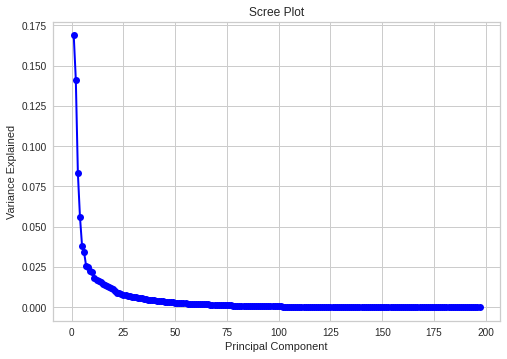

<Figure size 360x288 with 0 Axes>

In [125]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.figure(figsize=(5,4))
plt.show()

In [126]:
print( "Proporzione della varianza spiegata: " , pca.explained_variance_ratio_)  
    
out_sum  =  np.cumsum(pca.explained_variance_ratio_)  
print( "Spiegazione della varianza cumulativa prop.: " , out_sum )

Proporzione della varianza spiegata:  [1.68831226e-01 1.41375872e-01 8.31063520e-02 5.63114431e-02
 3.83284283e-02 3.40063612e-02 2.55317069e-02 2.51417785e-02
 2.21979650e-02 2.16231477e-02 1.79247135e-02 1.70639749e-02
 1.63811141e-02 1.56007272e-02 1.43132278e-02 1.38898423e-02
 1.32687460e-02 1.23848929e-02 1.16357621e-02 1.11712141e-02
 1.02853129e-02 9.10816692e-03 8.80286863e-03 8.07315291e-03
 7.85157816e-03 7.54788310e-03 7.20766104e-03 6.80193217e-03
 6.46959229e-03 6.33400730e-03 6.07394058e-03 5.83381739e-03
 5.48863406e-03 5.41930662e-03 5.06610816e-03 4.99667156e-03
 4.76987454e-03 4.62098475e-03 4.30800757e-03 4.21772876e-03
 3.98966489e-03 3.85536366e-03 3.70107031e-03 3.59407355e-03
 3.51317743e-03 3.30939539e-03 3.14818195e-03 2.98445017e-03
 2.93100631e-03 2.79731572e-03 2.74084235e-03 2.69055511e-03
 2.57091408e-03 2.48306477e-03 2.43703196e-03 2.27880851e-03
 2.22602466e-03 2.20656787e-03 2.07044749e-03 2.01592361e-03
 1.95713282e-03 1.87283331e-03 1.83092303e-03 1

In [127]:
print(pca.explained_variance_) 

[3.61239683e+01 3.02494841e+01 1.77818481e+01 1.20486762e+01
 8.20094101e+00 7.27617006e+00 5.46289089e+00 5.37945988e+00
 4.74958693e+00 4.62659616e+00 3.83526079e+00 3.65109288e+00
 3.50498458e+00 3.33800913e+00 3.06252936e+00 2.97193969e+00
 2.83904685e+00 2.64993325e+00 2.48964550e+00 2.39024849e+00
 2.20069668e+00 1.94882866e+00 1.88350552e+00 1.72737192e+00
 1.67996269e+00 1.61498258e+00 1.54218698e+00 1.45537521e+00
 1.38426612e+00 1.35525568e+00 1.29961051e+00 1.24823256e+00
 1.17437542e+00 1.15954178e+00 1.08396968e+00 1.06911268e+00
 1.02058606e+00 9.88728865e-01 9.21762712e-01 9.02446209e-01
 8.53648529e-01 8.24912770e-01 7.91899399e-01 7.69005839e-01
 7.51696903e-01 7.08094685e-01 6.73600658e-01 6.38567791e-01
 6.27132677e-01 5.98527573e-01 5.86444252e-01 5.75684543e-01
 5.50085554e-01 5.31288878e-01 5.21439470e-01 4.87585195e-01
 4.76291299e-01 4.72128229e-01 4.43003235e-01 4.31337036e-01
 4.18757865e-01 4.00720724e-01 3.91753392e-01 3.90593802e-01
 3.77483924e-01 3.622535

In [173]:
pca = PCA(n_components = 37)
pca.fit(X_res)
X_train_pca = pca.transform(X_res)

In [174]:
X_train_pca.shape

(311, 37)

In [175]:
# Visualization
import plotly.express as px # for data visualization
# Create a scatter plot
fig = px.scatter(None, x=X_train_pca[:,0], y=X_train_pca[:,1], opacity=1, color=y_res)

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title_text="PCA Transformation")

# Update marker size
fig.update_traces(marker=dict(size=5,
                             line=dict(color='black', width=0.2)))

fig.show()

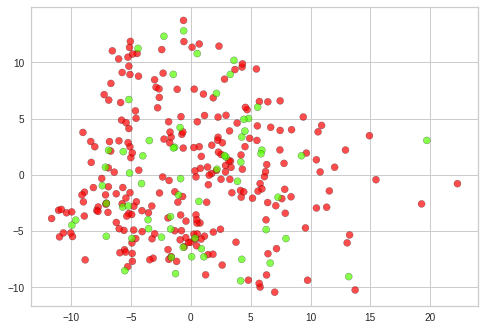

In [136]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_res, 
            cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [137]:
X_test_pca = pca.transform(X_test)

In [ ]:
check_params ={"criterion":["gini", "entropy"],
         "max_depth":[4, 6, 8, 10],
         "min_samples_split": [5, 10, 15, 20],
         "min_samples_leaf": [3, 5, 7, 9, 11]}
dt=DecisionTreeClassifier()
results = customGridSearch(X_train_pca, y_res, dt, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 11, 'min_samples_split': 15}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
0.737 (+/-0.108) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.732 (+/-0.118) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.716 (+/-0.110) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 15}
0.706 (+/-0.097) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 20}
0.720 (+/-0.113) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.719 (+/-0.115) for {'criterion

In [ ]:
results

{'f1_macro': {'criterion': 'entropy',
  'max_depth': 10,
  'min_samples_leaf': 11,
  'min_samples_split': 15}}

In [138]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=11, min_samples_split=15, random_state=42)
clf.fit(X_train_pca, y_res)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8527272727272728
F1-score [0.92003949 0.06896552]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       528
           1       0.05      0.14      0.07        22

    accuracy                           0.85       550
   macro avg       0.50      0.51      0.49       550
weighted avg       0.92      0.85      0.89       550



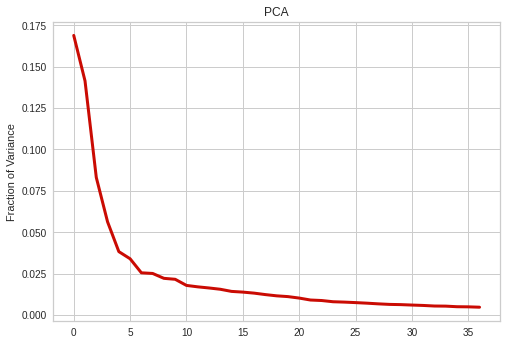

In [139]:
plt.plot(PCA(n_components=37).fit(X_res).explained_variance_ratio_, lw=3, color='r', ms=2)
plt.title("PCA")
plt.ylabel("Fraction of Variance")
plt.show()

RANDOM SUBSPACE PROJECTION

In [140]:
from sklearn import random_projection

In [170]:
rsp = random_projection.GaussianRandomProjection(n_components='auto', eps=0.9, random_state=42)
X_train_rsp = rsp.fit_transform(X_res)
X_train_rsp.shape

(311, 141)

In [172]:
# Visualization
import plotly.express as px # for data visualization
# Create a scatter plot
fig = px.scatter(None, x=X_train_rsp[:,0], y=X_train_rsp[:,1], opacity=1, color=y_res)

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title_text="GRP Transformation")

# Update marker size
fig.update_traces(marker=dict(size=5,
                             line=dict(color='black', width=0.2)))

fig.show()

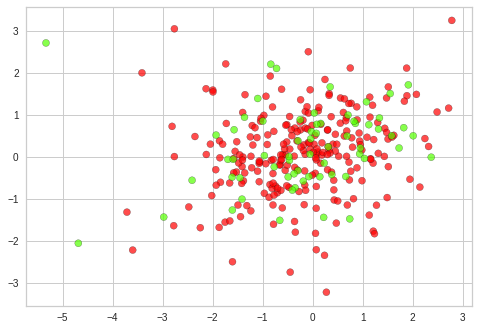

In [159]:
plt.scatter(X_train_rsp[:, 0], X_train_rsp[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [160]:
check_params ={"criterion":["gini", "entropy"],
         "max_depth":[4, 6, 8, 10],
         "min_samples_split": [5, 10, 15, 20],
         "min_samples_leaf": [3, 5, 7, 9, 11]}
dt=DecisionTreeClassifier()
results = customGridSearch(X_train_rsp, y_res, dt, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 5}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
0.799 (+/-0.099) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.793 (+/-0.099) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.788 (+/-0.096) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 15}
0.774 (+/-0.097) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 20}
0.792 (+/-0.082) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.791 (+/-0.083) for {'criterion':

In [161]:
results

{'f1_macro': {'criterion': 'entropy',
  'max_depth': 10,
  'min_samples_leaf': 3,
  'min_samples_split': 5}}

In [162]:
X_test_rsp = rsp.transform(X_test)

clf = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3, min_samples_split=5, random_state=42)
clf.fit(X_train_rsp, y_res)

y_pred = clf.predict(X_test_rsp)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7581818181818182
F1-score [0.86131387 0.05673759]
              precision    recall  f1-score   support

           0       0.96      0.78      0.86       528
           1       0.03      0.18      0.06        22

    accuracy                           0.76       550
   macro avg       0.50      0.48      0.46       550
weighted avg       0.92      0.76      0.83       550



Queste ultime 3 tecniche vengono usate solo per la visualizzazione dei dati all'interno del train set.. quindi il decision tree con questi metodi è inutile perchè viene fatto sempre sul train, poichè queste tecniche non consento la predict sul test :)

MULTI DIMENSIONAL SCALING


In [163]:
from sklearn.manifold import MDS

In [178]:
mds = MDS(n_components=2) #2 è il numero di default
X_train_mds = mds.fit_transform(X_res)
X_train_mds.shape

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



(311, 2)

In [179]:
# Visualization
import plotly.express as px # for data visualization
# Create a scatter plot
fig = px.scatter(None, x=X_train_mds[:,0], y=X_train_mds[:,1], opacity=1, color=y_res)

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title_text="MDS Transformation")

# Update marker size
fig.update_traces(marker=dict(size=5,
                             line=dict(color='black', width=0.2)))

fig.show()

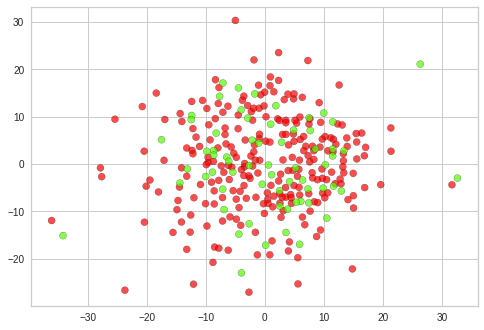

In [180]:
plt.scatter(X_train_mds[:, 0], X_train_mds[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
check_params ={"criterion":["gini", "entropy"],
         "max_depth":[4, 6, 8, 10],
         "min_samples_split": [5, 10, 15, 20],
         "min_samples_leaf": [3, 5, 7, 9, 11]}
dt=DecisionTreeClassifier()
results = customGridSearch(X_train_mds, y_res, dt, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 10}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
0.518 (+/-0.067) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.518 (+/-0.064) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.514 (+/-0.061) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 15}
0.507 (+/-0.063) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 20}
0.517 (+/-0.100) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.517 (+/-0.100) for {'criterion': '

In [ ]:
results

{'f1_macro': {'criterion': 'gini',
  'max_depth': 10,
  'min_samples_leaf': 3,
  'min_samples_split': 10}}

In [181]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=3,min_samples_split=10, random_state=42)
clf.fit(X_train_mds, y_res)

y_pred = clf.predict(X_train_mds)

print('Accuracy %s' % accuracy_score(y_res, y_pred))
print('F1-score %s' % f1_score(y_res, y_pred, average=None))
print(classification_report(y_res, y_pred))

Accuracy 0.8231511254019293
F1-score [0.89681051 0.38202247]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       247
           1       0.68      0.27      0.38        64

    accuracy                           0.82       311
   macro avg       0.76      0.62      0.64       311
weighted avg       0.80      0.82      0.79       311



IsoMap

In [182]:
from sklearn.manifold import Isomap

In [183]:
iso = Isomap(n_components=2) #2 è il default
X_train_iso = iso.fit_transform(X_res)
X_train_iso.shape

(311, 2)

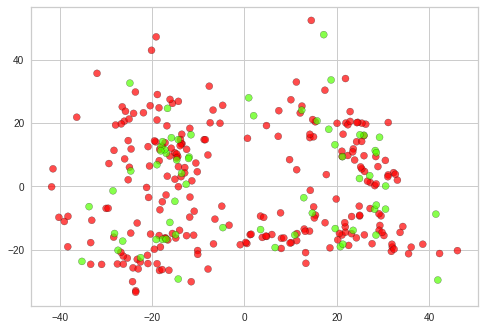

In [184]:
plt.scatter(X_train_iso[:, 0], X_train_iso[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
check_params ={"criterion":["gini", "entropy"],
         "max_depth":[4, 6, 8, 10],
         "min_samples_split": [5, 10, 15, 20],
         "min_samples_leaf": [3, 5, 7, 9, 11]}
dt=DecisionTreeClassifier()
results = customGridSearch(X_train_iso, y_res, dt, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 5}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
0.572 (+/-0.088) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.571 (+/-0.092) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.561 (+/-0.099) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 15}
0.551 (+/-0.106) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 20}
0.566 (+/-0.093) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.567 (+/-0.093) for {'criterion':

In [ ]:
results

{'f1_macro': {'criterion': 'entropy',
  'max_depth': 10,
  'min_samples_leaf': 3,
  'min_samples_split': 5}}

In [185]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3, min_samples_split=5, random_state=42)
clf.fit(X_train_iso, y_res)

y_pred = clf.predict(X_train_iso)

print('Accuracy %s' % accuracy_score(y_res, y_pred))
print('F1-score %s' % f1_score(y_res, y_pred, average=None))
print(classification_report(y_res, y_pred))

Accuracy 0.842443729903537
F1-score [0.9059501  0.51485149]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       247
           1       0.70      0.41      0.51        64

    accuracy                           0.84       311
   macro avg       0.78      0.68      0.71       311
weighted avg       0.83      0.84      0.83       311



t-SNE

In [186]:
from sklearn.manifold import TSNE

In [188]:
tsne = TSNE(n_components=2) #2 è il default
X_train_tsne = tsne.fit_transform(X_res)
X_train_tsne.shape

(311, 2)

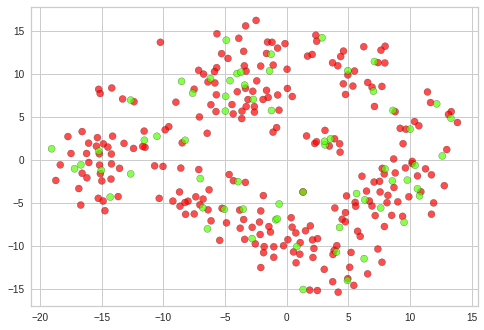

In [189]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
check_params ={"criterion":["gini", "entropy"],
         "max_depth":[4, 6, 8, 10],
         "min_samples_split": [5, 10, 15, 20],
         "min_samples_leaf": [3, 5, 7, 9, 11]}
dt=DecisionTreeClassifier()
results = customGridSearch(X_train_tsne, y_res, dt, check_params, "f1_macro")

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 5}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
0.546 (+/-0.073) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 5}
0.528 (+/-0.084) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.517 (+/-0.091) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 15}
0.514 (+/-0.082) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 20}
0.527 (+/-0.099) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.527 (+/-0.099) for {'criterion':

In [ ]:
results

{'f1_macro': {'criterion': 'entropy',
  'max_depth': 10,
  'min_samples_leaf': 3,
  'min_samples_split': 5}}

In [190]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=3,min_samples_split=5, random_state=42)
clf.fit(X_train_tsne, y_res)

y_pred = clf.predict(X_train_tsne)

print('Accuracy %s' % accuracy_score(y_res, y_pred))
print('F1-score %s' % f1_score(y_res, y_pred, average=None))
print(classification_report(y_res, y_pred))

Accuracy 0.8327974276527331
F1-score [0.90225564 0.42222222]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       247
           1       0.73      0.30      0.42        64

    accuracy                           0.83       311
   macro avg       0.79      0.63      0.66       311
weighted avg       0.82      0.83      0.80       311

